# I. Import thư viện

In [1]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
import numpy as np
import matplotlib.pyplot as plt
from sklearn import naive_bayes
from sklearn.svm import SVC
from sklearn import tree
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from underthesea import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import string
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# II. Đọc dữ liệu

In [2]:
data =  pd.read_excel("data/data.xlsx")
data

,sent,sentiment
0,"nhiệt tình giảng dạy , gần gũi với sinh viên .",postive
1,không giúp đỡ sinh viên trong những vấn đề xun...,negative
2,"thời lượng học quá dài , không đảm bảo tiếp th...",negative
3,"nội dung giảng dạy quá nhàm chán , khô khan .",negative
4,thầy rất tận tình và đi dạy rất đúng giờ .,postive
...,...,...
16172,hướng dẫn lab mơ hồ .,negative
16173,thầy cho chúng em những bài tập mang tính thực...,postive
16174,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,negative
16175,thầy chưa giải đáp thật chi tiết thắc mắc của ...,negative


In [3]:
data.isna().sum()
data=data.dropna()

# III. Phân bố dữ liệu

In [4]:
class_count=data['sentiment'].value_counts()
class_count =[class_count['negative'],class_count['neutral'],class_count['postive']]

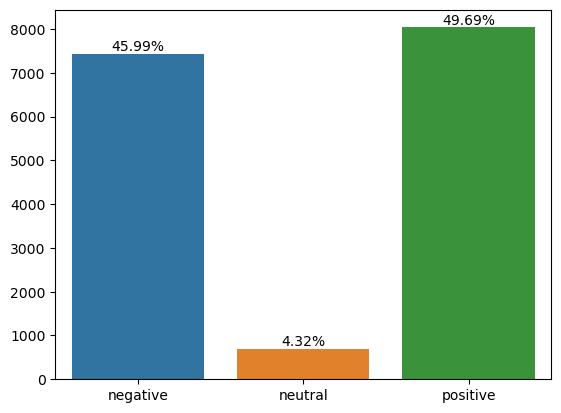

In [5]:
ax=sns.barplot(x=['negative','neutral','positive'], y=class_count, )
sum = class_count[0]+class_count[1]+class_count[2]
# Thêm chú thích trên từng cột
for i, value in enumerate(class_count):
    ax.text(i, value + 1, str(round(value/sum*100,2))+'%', ha='center', va='bottom')

# IV. Chia dữ liệu thành tập X và y

In [6]:
X=data.drop(columns=['sentiment'])
X.head()

,sent
0,"nhiệt tình giảng dạy , gần gũi với sinh viên ."
1,không giúp đỡ sinh viên trong những vấn đề xun...
2,"thời lượng học quá dài , không đảm bảo tiếp th..."
3,"nội dung giảng dạy quá nhàm chán , khô khan ."
4,thầy rất tận tình và đi dạy rất đúng giờ .


In [7]:
y=data['sentiment']
y.head()

0     postive
1    negative
2    negative
3    negative
4     postive
Name: sentiment, dtype: object

# V. Xử lý dữ liệu

## 1. Làm sạch dữ liệu

In [8]:
import re
def cleaning(text):
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = str(text)
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number
    text = re.sub('<.*?>+', '', text) # removing special characters,
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

In [9]:
X['sent_clean'] = X['sent'].apply(cleaning)
X

,sent,sent_clean
0,"nhiệt tình giảng dạy , gần gũi với sinh viên .",nhiệt tình giảng dạy gần gũi với sinh viên
1,không giúp đỡ sinh viên trong những vấn đề xun...,không giúp đỡ sinh viên trong những vấn đề xun...
2,"thời lượng học quá dài , không đảm bảo tiếp th...",thời lượng học quá dài không đảm bảo tiếp thu...
3,"nội dung giảng dạy quá nhàm chán , khô khan .",nội dung giảng dạy quá nhàm chán khô khan
4,thầy rất tận tình và đi dạy rất đúng giờ .,thầy rất tận tình và đi dạy rất đúng giờ
...,...,...
16172,hướng dẫn lab mơ hồ .,hướng dẫn lab mơ hồ
16173,thầy cho chúng em những bài tập mang tính thực...,thầy cho chúng em những bài tập mang tính thực...
16174,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,thầy không dạy nhiều chủ yếu cho sinh viên tự ...
16175,thầy chưa giải đáp thật chi tiết thắc mắc của ...,thầy chưa giải đáp thật chi tiết thắc mắc của ...


## 2. Tách từ (word tokenize)

In [10]:
def wt(text):
    return word_tokenize(text,format="text")
X['sent_clean_tokenize']=X['sent_clean'].apply(wt)
X.iloc[:,-2:]

,sent_clean,sent_clean_tokenize
0,nhiệt tình giảng dạy gần gũi với sinh viên,nhiệt_tình giảng_dạy gần_gũi với sinh_viên
1,không giúp đỡ sinh viên trong những vấn đề xun...,không giúp_đỡ sinh_viên trong những vấn_đề xun...
2,thời lượng học quá dài không đảm bảo tiếp thu...,thời_lượng học quá dài không đảm_bảo tiếp_thu ...
3,nội dung giảng dạy quá nhàm chán khô khan,nội_dung giảng_dạy quá nhàm chán khô khan
4,thầy rất tận tình và đi dạy rất đúng giờ,thầy rất tận_tình và đi dạy rất đúng giờ
...,...,...
16172,hướng dẫn lab mơ hồ,hướng_dẫn lab mơ_hồ
16173,thầy cho chúng em những bài tập mang tính thực...,thầy cho chúng_em những bài_tập mang tính thực...
16174,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,thầy không dạy nhiều chủ_yếu cho sinh_viên tự ...
16175,thầy chưa giải đáp thật chi tiết thắc mắc của ...,thầy chưa giải_đáp thật chi_tiết thắc_mắc của ...


## 3. Loại bỏ stop words

In [11]:
pos_words = ['nhiệt_tình', 'tận_tình', 'tận_tâm', 'hay', 'dễ']
neg_words = ['không', 'chưa']
sentiment_words = pos_words + neg_words

In [12]:
my_file = open("data/stop words.txt", "r", encoding="utf8")
data_file = my_file.read()
stop_words_vn = data_file.split("\n")
my_file.close()

In [13]:
def remove_stop_word(x):
    nosw = ''
    for word in x.split():
        if word in sentiment_words:
            nosw+=word+' '
        else:
            if word not in stop_words_vn:
                nosw+=word+' '
    return nosw

In [14]:
X['sent_clean_tokenize_nosw']=X['sent_clean_tokenize'].apply(remove_stop_word)
X.iloc[:,-2:]

,sent_clean_tokenize,sent_clean_tokenize_nosw
0,nhiệt_tình giảng_dạy gần_gũi với sinh_viên,nhiệt_tình giảng_dạy gần_gũi sinh_viên
1,không giúp_đỡ sinh_viên trong những vấn_đề xun...,không giúp_đỡ sinh_viên vấn_đề xung_quanh
2,thời_lượng học quá dài không đảm_bảo tiếp_thu ...,thời_lượng học không đảm_bảo tiếp_thu hiệu_quả
3,nội_dung giảng_dạy quá nhàm chán khô khan,nội_dung giảng_dạy nhàm chán khô khan
4,thầy rất tận_tình và đi dạy rất đúng giờ,thầy tận_tình đi dạy
...,...,...
16172,hướng_dẫn lab mơ_hồ,hướng_dẫn lab mơ_hồ
16173,thầy cho chúng_em những bài_tập mang tính thực...,thầy chúng_em bài_tập thực_hành thực_tiễn thực...
16174,thầy không dạy nhiều chủ_yếu cho sinh_viên tự ...,thầy không dạy chủ_yếu sinh_viên tìm_hiểu
16175,thầy chưa giải_đáp thật chi_tiết thắc_mắc của ...,thầy chưa giải_đáp chi_tiết thắc_mắc sinh_viên


## 4. Xóa bỏ các từ xuất hiện nhiều lần

In [15]:
pos_words = ['nhiệt_tình', 'tận_tình', 'tận_tâm', 'hay', 'dễ']
neg_words = ['không', 'chưa']

In [16]:
cnt = Counter()
for text in X["sent_clean_tokenize_nosw"].values:
    for word in str(text).split():
        cnt[word] += 1
cnt.most_common(5)

[('thầy', 4335),
 ('sinh_viên', 3755),
 ('dạy', 3074),
 ('không', 2887),
 ('nhiệt_tình', 2536)]

In [17]:
temp = pd.DataFrame(cnt.most_common(30))
temp.columns=['word', 'count']
import plotly.express as px
px.bar(temp, x="count", y="word", title='Các từ phổ biến nhất trong bộ ngữ liệu', orientation='h',
             width=700, height=700).update_layout(
    xaxis_title="Số lần xuất hiện", yaxis_title="Từ"
)

In [18]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS or word in sentiment_words])

In [19]:
X["sent_clean_tokenize_nosw_nofreq"] = X["sent_clean_tokenize_nosw"].apply(remove_freqwords)
X.iloc[:,-2:]

,sent_clean_tokenize_nosw,sent_clean_tokenize_nosw_nofreq
0,nhiệt_tình giảng_dạy gần_gũi sinh_viên,nhiệt_tình gần_gũi
1,không giúp_đỡ sinh_viên vấn_đề xung_quanh,không giúp_đỡ vấn_đề xung_quanh
2,thời_lượng học không đảm_bảo tiếp_thu hiệu_quả,thời_lượng không đảm_bảo tiếp_thu hiệu_quả
3,nội_dung giảng_dạy nhàm chán khô khan,nội_dung nhàm chán khô khan
4,thầy tận_tình đi dạy,tận_tình đi
...,...,...
16172,hướng_dẫn lab mơ_hồ,hướng_dẫn lab mơ_hồ
16173,thầy chúng_em bài_tập thực_hành thực_tiễn thực...,chúng_em thực_tiễn thực_sự hài_lòng
16174,thầy không dạy chủ_yếu sinh_viên tìm_hiểu,không chủ_yếu tìm_hiểu
16175,thầy chưa giải_đáp chi_tiết thắc_mắc sinh_viên,chưa giải_đáp chi_tiết thắc_mắc


##### Dữ liệu ban đầu và sau khi được xử lý

In [20]:
X_final = X[['sent', X.columns[-1]]]

In [21]:
X_final.columns = ['Dữ liệu ban đầu', 'Dữ liệu sau khi được xử lý']
X_final

,Dữ liệu ban đầu,Dữ liệu sau khi được xử lý
0,"nhiệt tình giảng dạy , gần gũi với sinh viên .",nhiệt_tình gần_gũi
1,không giúp đỡ sinh viên trong những vấn đề xun...,không giúp_đỡ vấn_đề xung_quanh
2,"thời lượng học quá dài , không đảm bảo tiếp th...",thời_lượng không đảm_bảo tiếp_thu hiệu_quả
3,"nội dung giảng dạy quá nhàm chán , khô khan .",nội_dung nhàm chán khô khan
4,thầy rất tận tình và đi dạy rất đúng giờ .,tận_tình đi
...,...,...
16172,hướng dẫn lab mơ hồ .,hướng_dẫn lab mơ_hồ
16173,thầy cho chúng em những bài tập mang tính thực...,chúng_em thực_tiễn thực_sự hài_lòng
16174,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,không chủ_yếu tìm_hiểu
16175,thầy chưa giải đáp thật chi tiết thắc mắc của ...,chưa giải_đáp chi_tiết thắc_mắc


In [22]:
def clean_text_column(text_column):
    return text_column.apply(cleaning)
def tokenize_column(text_column):
    return text_column.apply(wt)
def remove_stopwords_column(tokenized_column):
    return tokenized_column.apply(remove_stop_word)
def remove_freqwords_column(no_stopwords_column):
    return no_stopwords_column.apply(remove_freqwords)

In [23]:
pipeline = Pipeline([
    ('clean_text', FunctionTransformer(clean_text_column, validate=False)),
    ('tokenize', FunctionTransformer(tokenize_column, validate=False)),
    ('remove_stopwords', FunctionTransformer(remove_stopwords_column, validate=False)),
    ('remove_freqwords', FunctionTransformer(remove_freqwords_column, validate=False))
])

## 5. Mã hóa dữ liệu

In [24]:
X[['sent','sent_clean_tokenize_nosw_nofreq']]

,sent,sent_clean_tokenize_nosw_nofreq
0,"nhiệt tình giảng dạy , gần gũi với sinh viên .",nhiệt_tình gần_gũi
1,không giúp đỡ sinh viên trong những vấn đề xun...,không giúp_đỡ vấn_đề xung_quanh
2,"thời lượng học quá dài , không đảm bảo tiếp th...",thời_lượng không đảm_bảo tiếp_thu hiệu_quả
3,"nội dung giảng dạy quá nhàm chán , khô khan .",nội_dung nhàm chán khô khan
4,thầy rất tận tình và đi dạy rất đúng giờ .,tận_tình đi
...,...,...
16172,hướng dẫn lab mơ hồ .,hướng_dẫn lab mơ_hồ
16173,thầy cho chúng em những bài tập mang tính thực...,chúng_em thực_tiễn thực_sự hài_lòng
16174,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,không chủ_yếu tìm_hiểu
16175,thầy chưa giải đáp thật chi tiết thắc mắc của ...,chưa giải_đáp chi_tiết thắc_mắc


### 5.1 Mã hóa y

In [25]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 0, 0, ..., 0, 0, 0])

### 5.2 Vector hóa X với CountVectorizer

In [26]:
cv = CountVectorizer()
X_counts_vec = cv.fit_transform(X.iloc[:,-1])

### 5.3 Vector hóa X với TfidfVectorizer

In [27]:
tfidf = TfidfVectorizer()
X_tfidf_vec = tfidf.fit_transform(X.iloc[:,-1])

In [28]:
X_tfidf_vec

<16175x4502 sparse matrix of type '<class 'numpy.float64'>'
	with 57476 stored elements in Compressed Sparse Row format>

# VI. Train model

## 1. Train model dùng CountVectorizer

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_counts_vec, y, test_size=0.3,random_state=10)

In [30]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinomialNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinomialNB model accuracy is 82.90%
------------------------------------------------
Confusion Matrix:
      0   1     2
0  1911  24   341
1   110   7    76
2   271   8  2105
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2276
           1       0.18      0.04      0.06       193
           2       0.83      0.88      0.86      2384

    accuracy                           0.83      4853
   macro avg       0.62      0.59      0.59      4853
weighted avg       0.81      0.83      0.82      4853



Text(0.5, 1.0, 'Naive Bayes CountVectorizer')

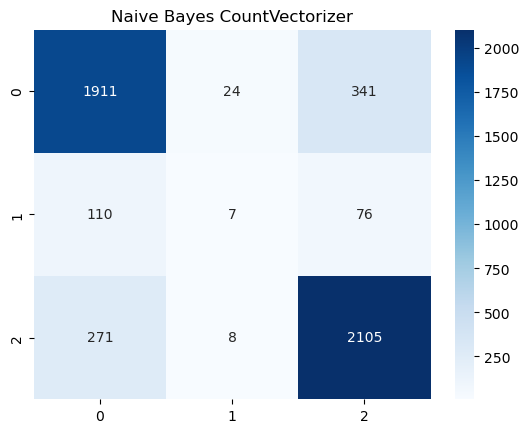

In [31]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predicted)), cmap='Blues', annot=True,fmt='g')
plt.title('Naive Bayes CountVectorizer')

## 2. Train model dùng TfidfVectorizer

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_vec, y, test_size=0.3,random_state=10)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_vec, y, test_size=0.3,random_state=10)
multinomial_model = MultinomialNB()
bernoulli_model = BernoulliNB()
complement_model = ComplementNB()

multinomial_model.fit(X_train, y_train)
bernoulli_model.fit(X_train, y_train)
complement_model.fit(X_train, y_train)

y_pred_1 = multinomial_model.predict(X_test)
y_pred_2 = bernoulli_model.predict(X_test)
y_pred_3= complement_model.predict(X_test)

accuracy_score1 = metrics.accuracy_score(y_pred_1, y_test)
accuracy_score2 = metrics.accuracy_score(y_pred_2, y_test)
accuracy_score3 = metrics.accuracy_score(y_pred_3, y_test)

print('MultinomialNB model accuracy is',str('{:04.2f}'.format(accuracy_score1*100))+'%')
print('BernoulliNB model accuracy is',str('{:04.2f}'.format(accuracy_score2*100))+'%')
print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score3*100))+'%')

MultinomialNB model accuracy is 83.06%
BernoulliNB model accuracy is 81.64%
ComplementNB model accuracy is 81.31%


In [34]:
model_name_MMB = {'Model':["MultinomialNB", "BernoulliNB", "ComplementNB"]}
acc = {'Accuracy':[accuracy_score1, accuracy_score2, accuracy_score3]}
pd.concat([pd.DataFrame(model_name_MMB),pd.DataFrame(acc)], axis=1)

,Model,Accuracy
0,MultinomialNB,0.830620
1,BernoulliNB,0.816402
2,ComplementNB,0.813105


In [35]:
MNB = BernoulliNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('BernoulliNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy is 81.64%
------------------------------------------------
Confusion Matrix:
      0   1     2
0  1799  20   457
1   102   3    88
2   220   4  2160
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2276
           1       0.11      0.02      0.03       193
           2       0.80      0.91      0.85      2384

    accuracy                           0.82      4853
   macro avg       0.59      0.57      0.56      4853
weighted avg       0.79      0.82      0.80      4853



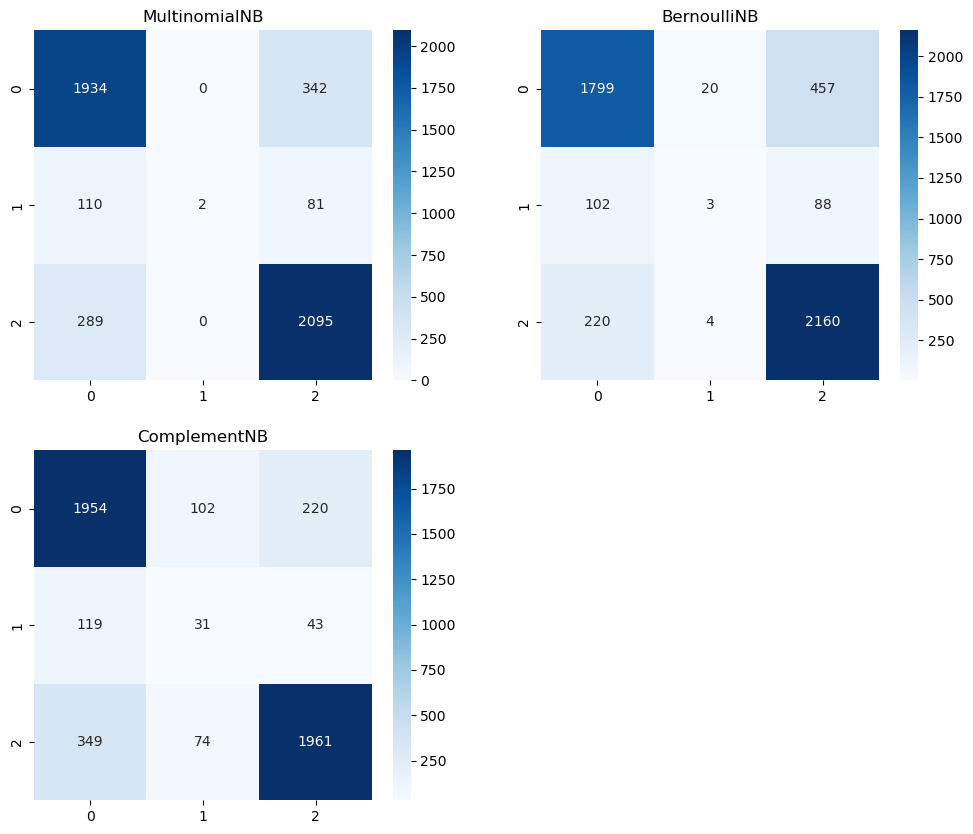

In [36]:
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(12,10))

predicted_list = [y_pred_1, y_pred_2, y_pred_3]
model_name_MMB = ["MultinomialNB", "BernoulliNB", "ComplementNB"]

index=0
for i in range(0,rows):
    for j in range(0,cols):
        if index<3:
            ax_i = ax[i, j]
            sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predicted_list[index])), cmap='Blues', annot=True,fmt='g', ax=ax_i)
            ax_i.set_title(model_name_MMB[index])
            index+=1
ax.flat[-1].set_visible(False)
plt.show()

# VII. So sánh với các mô hình khác

In [37]:
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SupportVectorMachines': svm.SVC(),
    'Decision Trees': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'NaiveBayes': MultinomialNB(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LightGBMClassifier': LGBMClassifier(),
    'XGBoost': XGBClassifier()
}
confusion_matrixs = []
accuracy_score_table = {'accuracy_score':[]}
for model_name, model_instance in models.items():
    model_instance.fit(X_train, y_train)
    predicted = model_instance.predict(X_test)
    accuracy_score = metrics.accuracy_score(predicted, y_test)
    accuracy_score_table['accuracy_score'].append(accuracy_score)
    print(f"-----{model_name}-----")
    print('Model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
    print('------------------------------------------------')
    print('Confusion Matrix:')
    print(pd.DataFrame(confusion_matrix(y_test, predicted)))
    confusion_matrixs.append(pd.DataFrame(confusion_matrix(y_test, predicted)))
    print('------------------------------------------------')
    print('Classification Report:')
    print(classification_report(y_test, predicted))


-----LogisticRegression-----
Model accuracy is 85.04%
------------------------------------------------
Confusion Matrix:
      0   1     2
0  2063   6   207
1   130  15    48
2   325  10  2049
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2276
           1       0.48      0.08      0.13       193
           2       0.89      0.86      0.87      2384

    accuracy                           0.85      4853
   macro avg       0.73      0.61      0.62      4853
weighted avg       0.84      0.85      0.84      4853

-----KNeighborsClassifier-----
Model accuracy is 66.29%
------------------------------------------------
Confusion Matrix:
      0   1     2
0  1042  15  1219
1    54  29   110
2   193  45  2146
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.4

In [38]:
model_names = {'model_name':[]}
for model_name, model_instance in models.items():
    model_names['model_name'].append(model_name)

In [39]:
model_names=pd.DataFrame(model_names)
model_accury=pd.DataFrame(accuracy_score_table)

In [40]:
comparison_table = pd.concat([model_names, model_accury],axis=1)
comparison_table.columns=['Model', 'Accuracy score (%)']
comparison_table['Accuracy score (%)']=comparison_table['Accuracy score (%)'].apply(lambda x: round(x,4))
comparison_table

,Model,Accuracy score (%)
0,LogisticRegression,0.8504
1,KNeighborsClassifier,0.6629
2,SupportVectorMachines,0.8558
3,Decision Trees,0.8115
4,RandomForestClassifier,0.8459
5,NaiveBayes,0.8306
6,AdaBoostClassifier,0.7981
7,GradientBoostingClassifier,0.8077
8,LightGBMClassifier,0.8323
9,XGBoost,0.8358


In [41]:
def plot_conf_mat(ax, i, k):
    ax_i = ax[i]
    sns.heatmap(pd.DataFrame(confusion_matrixs[k]), annot=True, cmap="YlGnBu" ,fmt='g', ax=ax_i)
    ax_i.xaxis.set_label_position("bottom")
    ax_i.set_title(model_names.model_name[k])
    ax_i.set_ylabel('Actual label')
    ax_i.set_xlabel('Predicted label')
    plt.tight_layout()
n_rows = 1
n_cols = 2
size = 5
k=-1

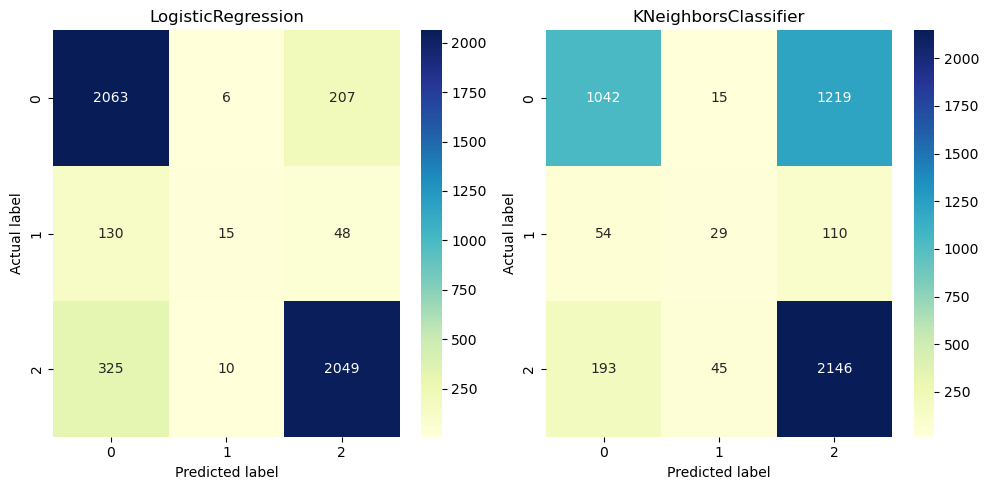

In [42]:
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*size,n_rows*size))
for i in range(0,n_cols):
    k+=1
    if k<11:
        plot_conf_mat(ax, i, k)

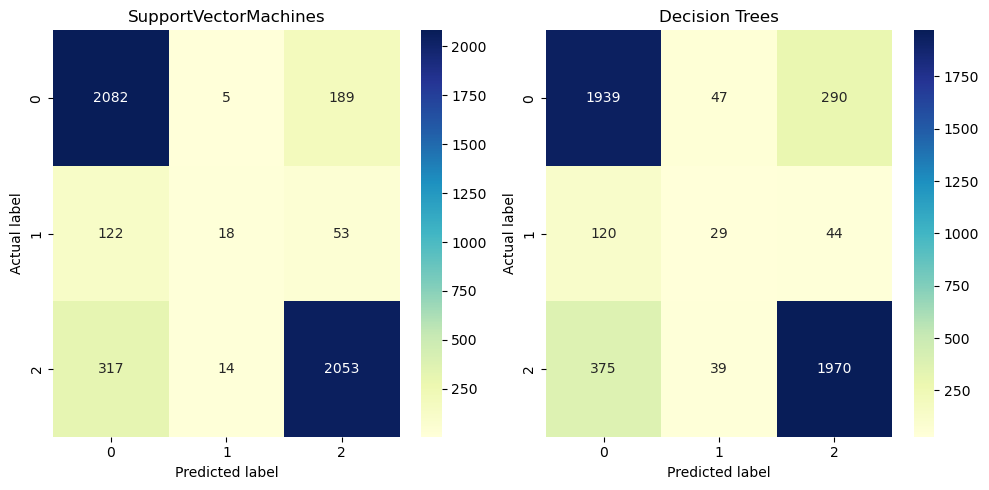

In [43]:
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*size,n_rows*size))
for i in range(0,n_cols):
    k+=1
    if k<11:
        plot_conf_mat(ax, i, k)

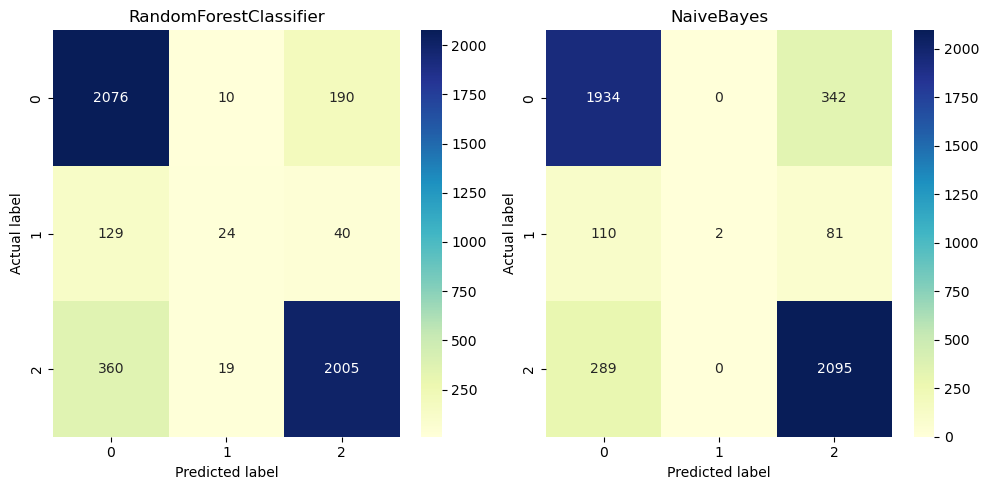

In [44]:
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*size,n_rows*size))
for i in range(0,n_cols):
    k+=1
    if k<11:
        plot_conf_mat(ax, i, k)

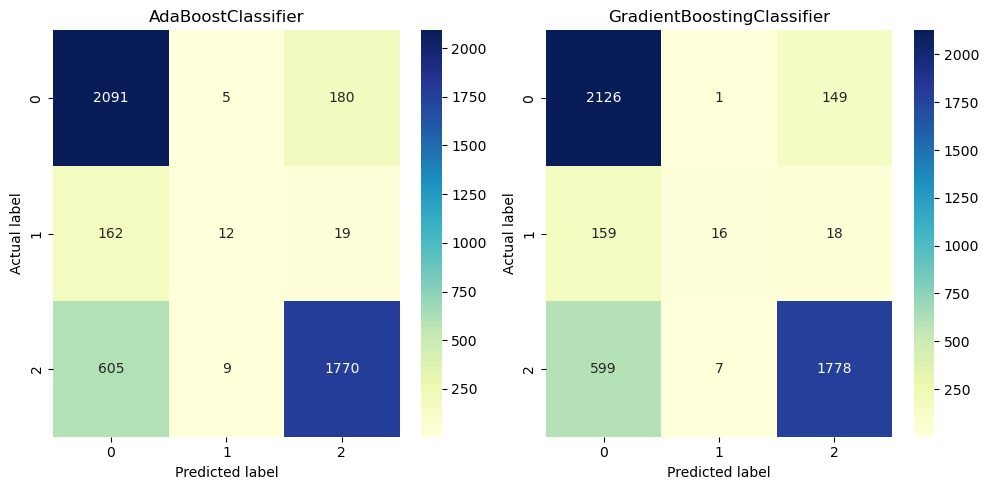

In [45]:
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*size,n_rows*size))
for i in range(0,n_cols):
    k+=1
    if k<11:
        plot_conf_mat(ax, i, k)

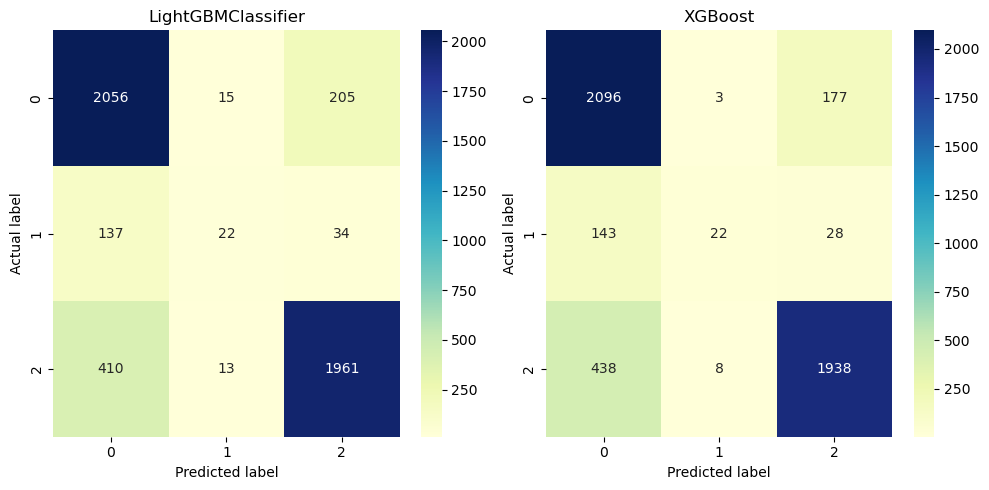

In [46]:
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*size,n_rows*size))
for i in range(0,n_cols):
    k+=1
    if k<11:
        plot_conf_mat(ax, i, k)

# VIII. Kiểm tra từng từ

In [47]:
test_data = pd.DataFrame([["thầy chửi mắng học sinh"], ["giảng viên rất nhiệt tình"]], columns=['sent'])
test_data

,sent
0,thầy chửi mắng học sinh
1,giảng viên rất nhiệt tình


In [48]:
pipeline = Pipeline([
    ('clean_text', FunctionTransformer(clean_text_column, validate=False)),
    ('tokenize', FunctionTransformer(tokenize_column, validate=False)),
    ('remove_stopwords', FunctionTransformer(remove_stopwords_column, validate=False)),
    ('remove_freqwords', FunctionTransformer(remove_freqwords_column, validate=False))
])

result = pipeline.fit_transform(test_data['sent'])

result_df = pd.DataFrame(result)
result_df.columns=['processed_sent']
test_data = pd.concat([test_data, result_df], axis=1)

In [49]:
test_data

,sent,processed_sent
0,thầy chửi mắng học sinh,chửi mắng học_sinh
1,giảng viên rất nhiệt tình,nhiệt_tình


In [50]:
test_X = tfidf.transform(test_data['processed_sent'])
predicted = multinomial_model.predict(test_X)
predicted = pd.DataFrame(predicted)
res = pd.concat([test_data['sent'], predicted[0].apply(lambda x: "tích cực" if int(x)==2 else "tiêu cực" if int(x)==0 else "trung tính")], axis=1)
res.columns = ['câu', 'trạng thái']

In [51]:
res

,câu,trạng thái
0,thầy chửi mắng học sinh,tiêu cực
1,giảng viên rất nhiệt tình,tích cực
